In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [34]:
RN8_c10_bz = np.load('eval_curves/ResNet8_CIFAR10_EV_Bezier_1_2/curve.npz')
RN26_c10_bz = np.load('eval_curves/ResNet26_CIFAR10_EV_Bezier_1_2/curve.npz')
RN38_c10_bz = np.load('eval_curves/ResNet38_CIFAR10_EV_Bezier_1_2/curve.npz')
RN65_c10_bz = np.load('eval_curves/ResNet65_CIFAR10_EV_Bezier_1_2/curve.npz')
RN119_c10_bz = np.load('eval_curves/ResNet119_CIFAR10_EV_Bezier_1_2/curve.npz')

RN8_c10_pc = np.load('eval_curves/ResNet8_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN26_c10_pc = np.load('eval_curves/ResNet26_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN38_c10_pc = np.load('eval_curves/ResNet38_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN65_c10_pc = np.load('eval_curves/ResNet65_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN119_c10_pc = np.load('eval_curves/ResNet119_CIFAR10_EV_PolyChain_1_2/curve.npz')

RN8_c100_bz = np.load('eval_curves/ResNet8_CIFAR100_EV_Bezier_1_2/curve.npz')
RN26_c100_bz = np.load('eval_curves/ResNet26_CIFAR100_EV_Bezier_1_2/curve.npz')
RN38_c100_bz = np.load('eval_curves/ResNet38_CIFAR100_EV_Bezier_1_2/curve.npz')
RN65_c100_bz = np.load('eval_curves/ResNet65_CIFAR100_EV_Bezier_1_2/curve.npz')

RN8_c100_pc = np.load('eval_curves/ResNet8_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN26_c100_pc = np.load('eval_curves/ResNet26_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN38_c100_pc = np.load('eval_curves/ResNet38_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN65_c100_pc = np.load('eval_curves/ResNet65_CIFAR100_EV_PolyChain_1_2/curve.npz')

models_cifar10 = [
    ('RN8', RN8_c10_bz, RN8_c10_pc),
    ('RN26', RN26_c10_bz, RN26_c10_pc),
    ('RN38', RN38_c10_bz, RN38_c10_pc),
    ('RN65', RN65_c10_bz, RN65_c10_pc),
    ('RN119', RN119_c10_bz, RN119_c10_pc),
]

models_cifar100 = [
    ('RN8', RN8_c100_bz, RN8_c100_pc),
    ('RN26', RN26_c100_bz, RN26_c100_pc),
    ('RN38', RN38_c100_bz, RN38_c100_pc),
    ('RN65', RN65_c100_bz, RN65_c100_pc),
]


In [ ]:
def summarize_models(models):
    
    # ---- Accuracy mean/min/max ----
    df_bez = pd.DataFrame({name: bz['te_acc'] for name, bz, _ in models}).T
    df_poly = pd.DataFrame({name: pc['te_acc'] for name, _, pc in models}).T
    
    df_bez = df_bez.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    df_poly = df_poly.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    
    
    # ---- AUC + Peak height ----
    def compute_metrics(df):
        ts = df['ts']
        te = df['te_acc']
        auc = np.max(te) - np.trapezoid(te, ts)
        peak = np.max(te) - np.min(te)
        return pd.Series({'auc': auc, 'peak_height': peak})

    df_bez_auc = pd.DataFrame({name: compute_metrics(bz) for name, bz, _ in models}).T
    df_poly_auc = pd.DataFrame({name: compute_metrics(pc) for name, _, pc in models}).T
    
    df_bez_auc['AUC_display'] = df_bez_auc['auc'].map(lambda x: f"{x:.4f}")
    df_bez_auc['PeakHeight_display'] = df_bez_auc['peak_height'].map(lambda x: f"{x:.2f}%")

    df_poly_auc['AUC_display'] = df_poly_auc['auc'].map(lambda x: f"{x:.4f}")
    df_poly_auc['PeakHeight_display'] = df_poly_auc['peak_height'].map(lambda x: f"{x:.2f}%")


    # ---- Return all four tables ----
    return df_bez, df_poly, df_bez_auc[['AUC_display','PeakHeight_display']], df_poly_auc[['AUC_display','PeakHeight_display']]


In [41]:

bez_c10_table, poly_c10_table, bez_c10_auc_table, poly_c10_auc_table = summarize_models(models_cifar10)
bez_c100_table, poly_c100_table, bez_c100_auc_table, poly_c100_auc_table = summarize_models(models_cifar100)

#########################
# CIFAR 10
print("-"*50)
print("CIFAR10")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c10_table)

print("PolyChain accuracy:")
display(poly_c10_table)

print("Bezier AUC + Peak Height:")
display(bez_c10_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c10_auc_table)

#########################
# CIFAR 100
print("-"*50)
print("CIFAR100")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c100_table)

print("PolyChain accuracy:")
display(poly_c100_table)

print("Bezier AUC + Peak Height:")
display(bez_c100_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c100_auc_table)


--------------------------------------------------
CIFAR10
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,85.55%,83.72%,87.71%
RN26,91.56%,90.57%,92.57%
RN38,92.20%,91.37%,93.18%
RN65,93.02%,92.37%,93.99%
RN119,93.74%,93.25%,94.35%


PolyChain accuracy:


,mean,min,max
RN8,85.27%,83.51%,87.62%
RN26,91.36%,89.93%,92.47%
RN38,92.15%,91.21%,93.11%
RN65,92.89%,92.20%,93.90%
RN119,93.49%,92.56%,94.19%


Bezier AUC + Peak Height:


,AUC_display,PeakHeight_display
RN8,2.1959,3.99%
RN26,1.0238,2.00%
RN38,0.9978,1.81%
RN65,0.9788,1.62%
RN119,0.6157,1.10%


PolyChain AUC + Peak Height:


,AUC_display,PeakHeight_display
RN8,2.3770,4.11%
RN26,1.1292,2.54%
RN38,0.9705,1.90%
RN65,1.0170,1.70%
RN119,0.7061,1.63%


--------------------------------------------------
CIFAR100
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,55.84%,52.90%,59.92%
RN26,67.02%,64.52%,69.71%
RN38,68.94%,66.96%,71.18%
RN65,72.30%,71.15%,73.44%


PolyChain accuracy:


,mean,min,max
RN8,55.58%,52.93%,59.55%
RN26,66.82%,64.35%,69.44%
RN38,68.90%,67.42%,70.78%
RN65,72.35%,71.18%,73.63%


Bezier AUC + Peak Height:


,AUC_display,PeakHeight_display
RN8,4.1395,7.02%
RN26,2.7302,5.19%
RN38,2.2612,4.22%
RN65,1.1581,2.29%


PolyChain AUC + Peak Height:


,AUC_display,PeakHeight_display
RN8,4.0326,6.62%
RN26,2.6526,5.09%
RN38,1.9018,3.36%
RN65,1.2898,2.45%


In [35]:
def plot_model_curves(models, title="Curve Test Accuracy for ResNet Models on CIFAR-10"):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # ---- Left: Bezier curves ----
    for name, bz, _ in models:
        ts = bz['ts']
        te_acc = bz['te_acc']
        axs[0].plot(ts, te_acc, label=name)

    axs[0].set_xlabel('t (Path Parameter)')
    axs[0].set_ylabel('Test Accuracy (%)')
    axs[0].set_title('Bezier')
    axs[0].legend()

    # ---- Right: PolyChain curves ----
    for name, _, pc in models:
        ts = pc['ts']
        te_acc = pc['te_acc']
        axs[1].plot(ts, te_acc, label=name)

    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_title('PolyChain')
    axs[1].legend()

    # ---- Global title / layout ----
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()


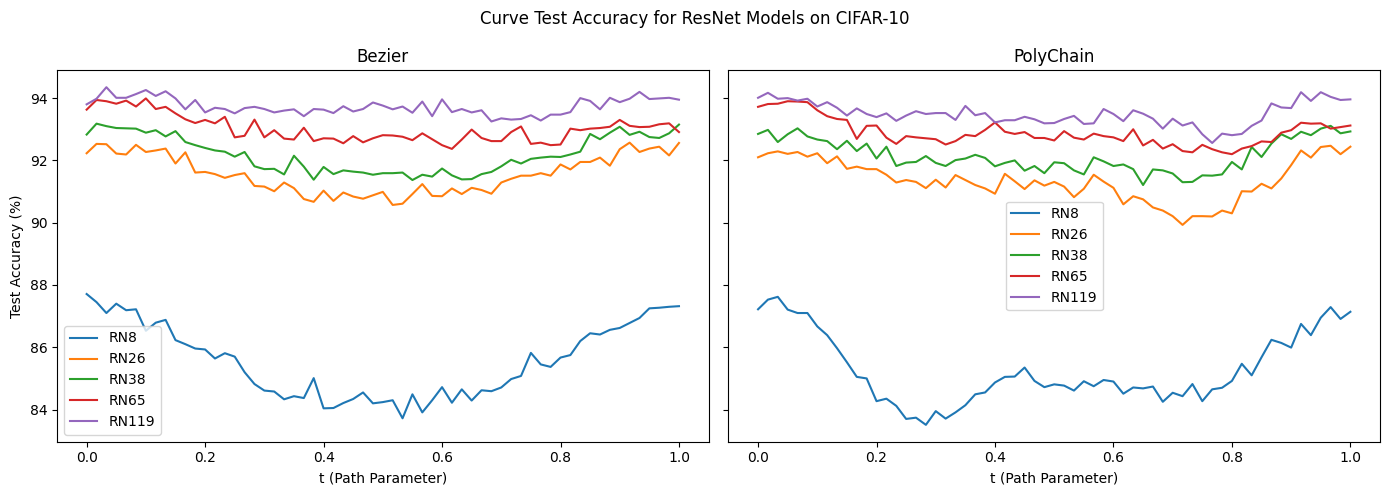

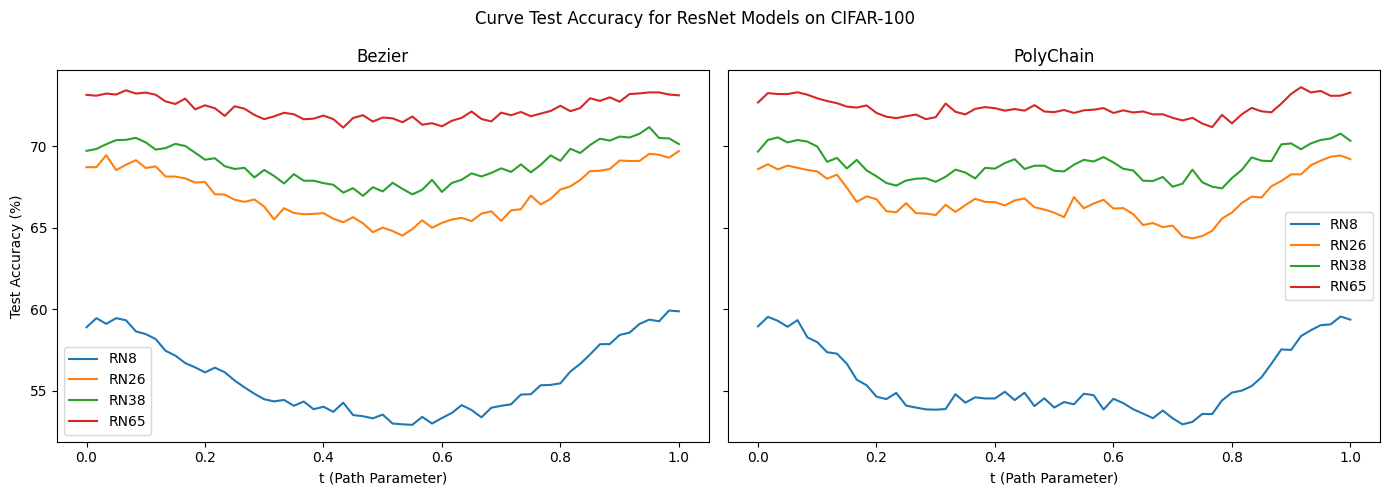

In [42]:
plot_model_curves(models_cifar10, title="Curve Test Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, title="Curve Test Accuracy for ResNet Models on CIFAR-100")

In [24]:
# #Open angles/angle_data.csv as pandas dataframe
angle_df = pd.read_csv('results/angles/angle_data.csv', delimiter=';')
cifar10_df = angle_df[angle_df['dataset'] == 'CIFAR10']
cifar100_df = angle_df[angle_df['dataset'] == 'CIFAR100']

print("CIFAR10 Data:")
display(cifar10_df)

print("CIFAR100 Data:")
display(cifar100_df)


CIFAR10 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
0,CIFAR10,ResNet8,38.75229,38.68528,1.211135,69.392947
1,CIFAR10,ResNet26,49.15702,48.49026,1.087526,62.310644
2,CIFAR10,ResNet38,49.77663,53.36667,1.095705,62.779255
3,CIFAR10,ResNet65,50.40259,49.95597,0.993303,56.912052
4,CIFAR10,ResNet119,51.88686,54.48196,0.962648,55.155670


CIFAR100 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
5,CIFAR100,ResNet8,58.72358,59.81335,1.234761,70.746611
6,CIFAR100,ResNet26,76.24537,78.02316,1.200143,68.763103
7,CIFAR100,ResNet38,85.79421,84.68199,1.224831,70.177646
8,CIFAR100,ResNet65,70.44422,72.94723,1.150420,65.914206


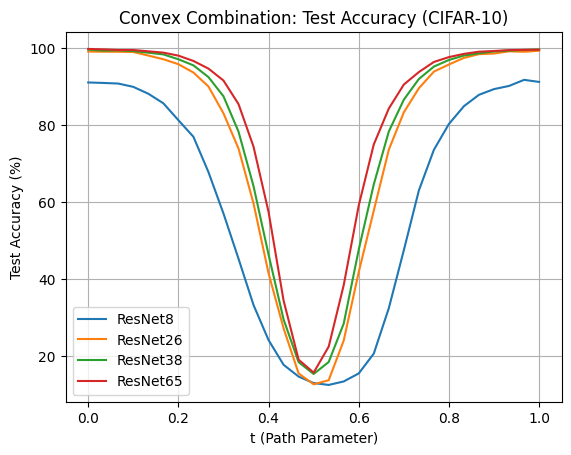

In [21]:
rn18_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn26_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn38_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn65_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR10_convex.csv', delimiter=',', skiprows=1)

plt.plot(rn18_convex[:,0], rn18_convex[:,2], label='ResNet8')
plt.plot(rn26_convex[:,0], rn26_convex[:,2], label='ResNet26')
plt.plot(rn38_convex[:,0], rn38_convex[:,2], label='ResNet38')
plt.plot(rn65_convex[:,0], rn65_convex[:,2], label='ResNet65')

plt.legend()
plt.xlabel('t (Path Parameter)')
plt.ylabel('Test Accuracy (%)')
plt.title('Convex Combination: Test Accuracy (CIFAR-10)')
plt.grid()
plt.show()